Run ```clean.py``` to get and clean data

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.read_csv('../data/pgaTourData.csv')

In [14]:
print(df.head().to_markdown())

|    | Player Name    |   Rounds |   Fairway Percentage |   Year |   Avg Distance |   gir |   Average Putts |   Average Scrambling |   Average Score | Points   |   Wins |   Top 10 |   Average SG Putts |   Average SG Total |   SG:OTT |   SG:APR |   SG:ARG | Money      |
|---:|:---------------|---------:|---------------------:|-------:|---------------:|------:|----------------:|---------------------:|----------------:|:---------|-------:|---------:|-------------------:|-------------------:|---------:|---------:|---------:|:-----------|
|  0 | Henrik Stenson |       60 |                75.19 |   2018 |          291.5 | 73.51 |           29.93 |                60.67 |          69.617 | 868      |    nan |        5 |             -0.207 |              1.153 |    0.427 |    0.96  |   -0.027 | $2,680,487 |
|  1 | Ryan Armour    |      109 |                73.58 |   2018 |          283.5 | 68.22 |           29.31 |                60.13 |          70.758 | 1,006    |      1 |        3 |         

In [ ]:
%run '../src/main.py'

In [3]:
df[df['Player Name']=='Dustin Johnson']

,Player Name,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
124,Dustin Johnson,2018,3.0,1.0,10.0,1.0,59.46,125.0,314.0,6.0,...,0.919,1.0,0.829,5.0,0.238,33.0,0.385,25.0,2.372,1.0
336,Dustin Johnson,2017,3.0,2.0,7.0,4.0,56.44,144.0,314.4,2.0,...,1.071,1.0,0.670,7.0,0.121,58.0,0.019,96.0,1.972,2.0
520,Dustin Johnson,2016,2.0,2.0,12.0,1.0,57.17,138.0,313.6,2.0,...,1.117,2.0,0.477,26.0,0.070,75.0,0.328,36.0,1.993,2.0
732,Dustin Johnson,2015,1.0,6.0,8.0,3.0,55.53,165.0,317.7,1.0,...,0.960,2.0,0.579,16.0,-0.212,160.0,0.128,71.0,1.455,8.0
898,Dustin Johnson,2014,1.0,6.0,7.0,9.0,57.18,146.0,311.0,2.0,...,0.730,5.0,0.533,20.0,-0.015,109.0,0.082,82.0,1.331,10.0
1099,Dustin Johnson,2013,1.0,5.0,5.0,13.0,53.36,171.0,305.8,2.0,...,0.332,39.0,0.663,10.0,-0.090,122.0,-0.101,120.0,0.805,31.0
1266,Dustin Johnson,2012,1.0,6.0,5.0,14.0,56.30,158.0,310.2,4.0,...,0.720,6.0,0.638,13.0,-0.035,114.0,0.185,58.0,1.509,7.0
1446,Dustin Johnson,2011,0.0,31.0,5.0,14.0,57.17,147.0,314.2,3.0,...,0.912,1.0,0.195,67.0,0.019,97.0,-0.549,174.0,0.576,48.0
1657,Dustin Johnson,2010,1.0,6.0,5.0,14.0,56.35,172.0,308.5,3.0,...,0.760,2.0,0.288,53.0,-0.179,154.0,0.112,80.0,0.979,15.0


Text(0, 0.5, 'Wins/Top 10s')

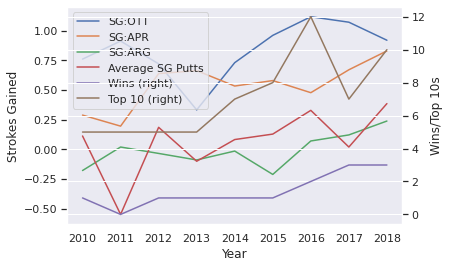

In [62]:
fig,ax = plt.subplots()
df[df['Player Name']=='Dustin Johnson'].plot(x='Year',y=strokes_gained_stats.column_names,ax=ax)
df[df['Player Name']=='Dustin Johnson'].plot(x='Year',y=['Wins','Top 10'],ax=ax,secondary_y=True)
ax.set_ylabel('Strokes Gained')
ax.right_ax.set_ylabel('Wins/Top 10s')

In [80]:
player = 'Dustin Johnson'
def make_player_overview_plot(df,player):
    '''
    Plots the strokes gained statistics and number of wins and top 10s for each year for an individual player.
    INPUT: df - data frame
           player -  str 
    '''
    fig,axs = plt.subplots(2,1,sharex=True)
    df[df['Player Name']==player].plot(x='Year',y=strokes_gained_stats.column_names,ax=axs[0])
    axs[0].set_ylabel('Strokes Gained')
    axs[0].legend(['SG:OTT','SG:APP','SG:ARG','SG:Putting'],bbox_to_anchor=(1,0.5),loc='center left')
    df[df['Player Name']==player].plot(x='Year',y=['Top 10','Wins'],ax=axs[1])
    axs[1].set_ylabel('Wins/Top 10s')
    axs[1].legend(['Top 10s','Wins'],bbox_to_anchor=(1,0.5),loc='center left')
    fig.suptitle(f'{player} Overview')
    fig.tight_layout()

In [57]:
def get_top_individuals(df):
    '''
    Get the player with the most total wins, most total top 10s, and the most yearly top performances
    INPUT: df - data frame
    OUTPUT: individual_track_list - list of unique player names
    '''
    individual_track_list = []
    for col in ['Wins','Top 10']:
        individual_track_list.append(df.groupby('Player Name').sum()[[col]].idxmax()[0])
    top_performers = df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]
    top_performers_name_list = list(top_performers['Player Name'])
    num_yearly_top_performances = {name: top_performers_name_list.count(name) for name in top_performers_name_list}
    individual_track_list.append(max(num_yearly_top_performances, key=num_yearly_top_performances.get))
    return list(set(individual_track_list))
individual_track_list = get_top_individuals(df)
individual_track_list

['Matt Kuchar', 'Dustin Johnson']

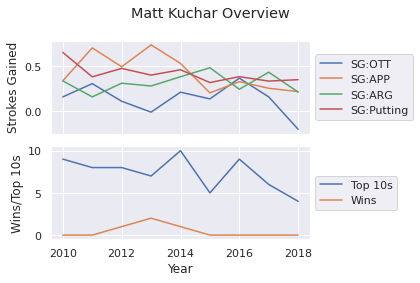

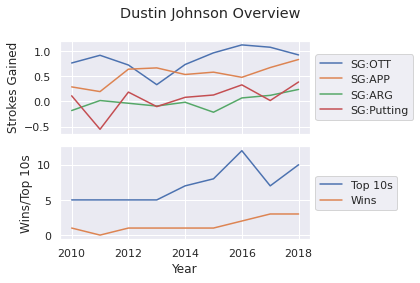

In [81]:
for player in individual_track_list:
    make_player_overview_plot(df,player)

In [89]:
df.groupby('Player Name').sum()[['Top 10','Wins']].sort_values(by='Top 10',ascending=False)

,Top 10,Wins
Player Name,,
Matt Kuchar,66.0,4.0
Dustin Johnson,64.0,13.0
Justin Rose,50.0,8.0
Rickie Fowler,50.0,3.0
Rory McIlroy,49.0,9.0
...,...,...
Kirk Triplett,0.0,0.0
Sandy Lyle,0.0,0.0
Kiradech Aphibarnrat,0.0,0.0


In [11]:
print(df.head().to_markdown())

|    | Player Name    |   Year |   Wins |   Wins rank |   Top 10 |   Top 10 rank |   Fairway Percentage |   Fairway Percentage rank |   Avg Distance |   Avg Distance rank |   gir |   gir rank |   Average Scrambling |   Average Scrambling rank |   Average Putts |   Average Putts rank |   Average Score |   Average Score rank |   SG:OTT |   SG:OTT rank |   SG:APR |   SG:APR rank |   SG:ARG |   SG:ARG rank |   Average SG Putts |   Average SG Putts rank |   Average SG Total |   Average SG Total rank |
|---:|:---------------|-------:|-------:|------------:|---------:|--------------:|---------------------:|--------------------------:|---------------:|--------------------:|------:|-----------:|---------------------:|--------------------------:|----------------:|---------------------:|----------------:|---------------------:|---------:|--------------:|---------:|--------------:|---------:|--------------:|-------------------:|------------------------:|-------------------:|-----------------------

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:xlabel='SG: Approach-the-Green', ylabel='SG: Around-the-Green'>,
        <AxesSubplot:xlabel='SG: Off-the-Tee    ', ylabel='SG:ARG'>],
       dtype=object))

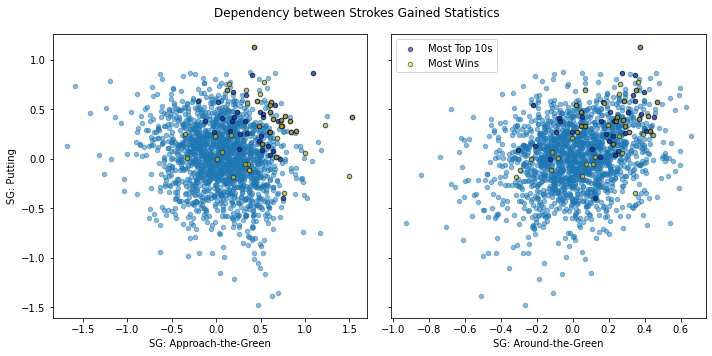

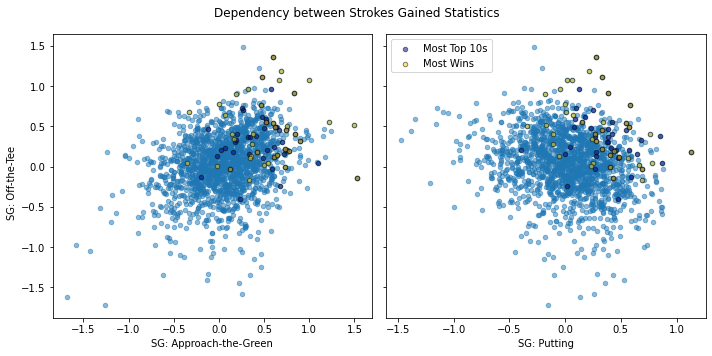

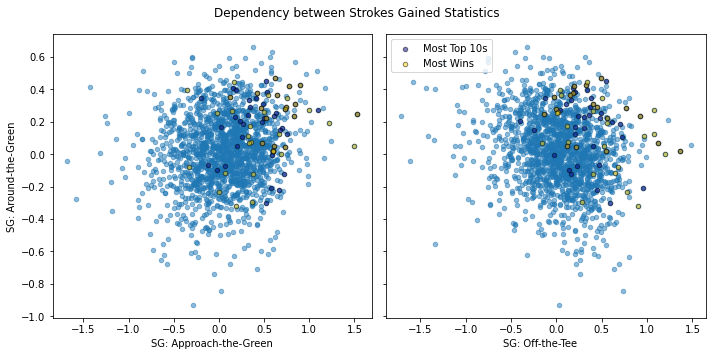

In [14]:
from plotting import make_double_scatter_plot
make_double_scatter_plot(df,['SG:APR','SG:ARG'],'Average SG Putts',alpha=.5,title='Dependency between Strokes Gained Statistics',with_top_performers=True)
make_double_scatter_plot(df,['SG:APR','Average SG Putts'],'SG:OTT',alpha=.5,title='Dependency between Strokes Gained Statistics',with_top_performers=True)
make_double_scatter_plot(df,['SG:APR','SG:OTT'],'SG:ARG',alpha=.5,title='Dependency between Strokes Gained Statistics',with_top_performers=True)

In [16]:
df.columns

Index(['Player Name', 'Year', 'Wins', 'Wins rank', 'Top 10', 'Top 10 rank',
       'Fairway Percentage', 'Fairway Percentage rank', 'Avg Distance',
       'Avg Distance rank', 'gir', 'gir rank', 'Average Scrambling',
       'Average Scrambling rank', 'Average Putts', 'Average Putts rank',
       'Average Score', 'Average Score rank', 'SG:OTT', 'SG:OTT rank',
       'SG:APR', 'SG:APR rank', 'SG:ARG', 'SG:ARG rank', 'Average SG Putts',
       'Average SG Putts rank', 'Average SG Total', 'Average SG Total rank'],
      dtype='object')

2.0
Year
2010    2.0
2011    2.0
2012    2.0
2013    2.0
2014    2.0
2015    2.0
2016    2.0
2017    3.0
2018    3.0
Name: Wins, dtype: float64


<AxesSubplot:>

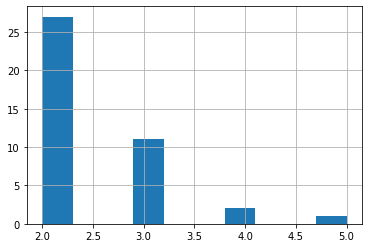

In [45]:
print(df[(df['Wins rank']<=3)].Wins.min())
print(df[(df['Wins rank']<=3)].groupby('Year').Wins.min())
df[(df['Wins rank']<=3)].Wins.hist()

<AxesSubplot:>

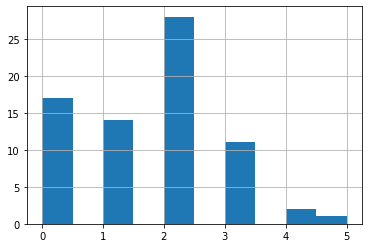

In [24]:
df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)].Wins.hist()

<AxesSubplot:>

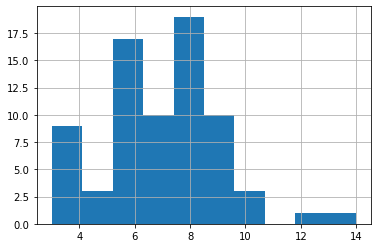

In [25]:
df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Top 10'].hist()

6.0
Year
2010    6.0
2011    8.0
2012    8.0
2013    7.0
2014    9.0
2015    8.0
2016    9.0
2017    8.0
2018    8.0
Name: Top 10, dtype: float64


<AxesSubplot:>

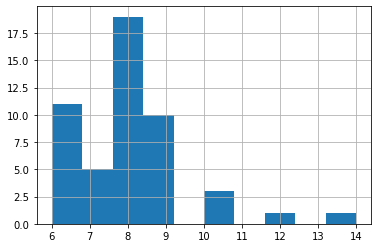

In [43]:
print(df[(df['Top 10 rank']<=3)]['Top 10'].min())
print(df[(df['Top 10 rank']<=3)].groupby('Year')['Top 10'].min())
df[(df['Top 10 rank']<=3)]['Top 10'].hist()

In [29]:
df.groupby('Year').max('Wins')

,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,gir,gir rank,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
Year,,,,,,,,,,,,,,,,,,,,,
2010,2.0,30.0,9.0,172.0,76.08,192.0,315.5,192.0,72.49,192.0,...,0.798,192.0,1.164,192.0,0.559,192.0,0.870,192.0,1.818,192.0
2011,2.0,31.0,10.0,154.0,75.65,186.0,318.4,186.0,71.68,186.0,...,0.912,186.0,1.094,186.0,0.593,186.0,0.870,186.0,2.278,186.0
2012,3.0,32.0,8.0,154.0,73.00,191.0,315.5,191.0,70.34,191.0,...,1.485,191.0,1.224,191.0,0.567,191.0,0.860,191.0,2.406,191.0
2013,5.0,30.0,9.0,162.0,71.81,180.0,306.3,180.0,71.96,180.0,...,0.937,180.0,1.533,180.0,0.628,180.0,0.857,180.0,2.193,180.0
2014,3.0,35.0,10.0,155.0,75.49,177.0,314.3,177.0,72.43,177.0,...,1.367,177.0,1.175,177.0,0.571,177.0,0.882,177.0,2.266,177.0
2015,4.0,36.0,14.0,170.0,76.88,184.0,317.7,184.0,73.52,184.0,...,1.194,184.0,1.244,184.0,0.660,184.0,0.722,184.0,2.210,184.0
2016,3.0,37.0,12.0,161.0,73.36,185.0,314.5,184.0,71.63,185.0,...,1.230,185.0,1.491,185.0,0.544,185.0,1.130,185.0,2.118,185.0
2017,4.0,36.0,9.0,172.0,72.73,190.0,316.7,190.0,70.64,190.0,...,1.071,190.0,0.939,190.0,0.538,190.0,0.852,190.0,1.988,190.0
2018,3.0,35.0,10.0,167.0,75.19,193.0,319.7,193.0,73.51,193.0,...,0.919,193.0,0.960,193.0,0.595,193.0,0.790,193.0,2.372,193.0


In [40]:
df[(df['Year']==2010)].sort_values(by='Wins',ascending=False).head(10)

,Player Name,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
1632,Ernie Els,2010,2.0,1.0,6.0,3.0,60.16,147.0,288.4,90.0,...,0.215,59.0,0.735,6.0,0.043,86.0,0.330,39.0,1.322,7.0
1515,Steve Stricker,2010,2.0,1.0,6.0,3.0,68.50,30.0,282.9,134.0,...,0.191,65.0,0.773,3.0,0.419,5.0,0.437,22.0,1.818,1.0
1557,Justin Rose,2010,2.0,1.0,4.0,25.0,65.17,72.0,287.8,97.0,...,0.338,39.0,0.168,78.0,0.447,3.0,0.243,53.0,1.195,8.0
1523,Hunter Mahan,2010,2.0,1.0,3.0,35.0,67.94,38.0,291.8,57.0,...,0.642,10.0,0.069,97.0,-0.115,137.0,0.068,87.0,0.665,39.0
1495,Jim Furyk,2010,2.0,1.0,6.0,3.0,71.01,10.0,276.0,179.0,...,0.150,76.0,0.641,11.0,0.367,10.0,0.402,26.0,1.564,3.0
2248,Anthony Kim,2010,1.0,6.0,4.0,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1649,Ryan Palmer,2010,1.0,6.0,3.0,35.0,57.23,164.0,295.8,26.0,...,0.175,67.0,0.010,116.0,-0.324,179.0,0.433,23.0,0.294,76.0
1598,Ian Poulter,2010,1.0,6.0,2.0,65.0,62.72,113.0,286.8,109.0,...,-0.109,122.0,-0.655,185.0,0.221,36.0,0.213,62.0,-0.335,150.0
1597,Carl Pettersson,2010,1.0,6.0,4.0,25.0,62.82,112.0,282.1,137.0,...,-0.180,137.0,-0.152,140.0,0.069,72.0,0.818,2.0,0.554,53.0
1595,Adam Scott,2010,1.0,6.0,2.0,65.0,62.93,110.0,294.4,33.0,...,0.472,20.0,1.164,1.0,-0.027,110.0,-0.746,186.0,0.862,19.0


In [42]:
df[(df['Year']==2010)].sort_values(by='Top 10',ascending=False).head(15)

,Player Name,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
1524,Matt Kuchar,2010,0.0,30.0,9.0,1.0,67.89,39.0,286.9,105.0,...,0.158,73.0,0.336,39.0,0.334,16.0,0.648,8.0,1.461,5.0
1561,Retief Goosen,2010,0.0,30.0,8.0,2.0,64.79,76.0,291.4,60.0,...,0.337,40.0,0.185,72.0,0.395,7.0,0.679,7.0,1.598,2.0
1644,Ricky Barnes,2010,0.0,30.0,6.0,3.0,58.37,159.0,285.5,117.0,...,-0.244,150.0,0.675,8.0,0.149,49.0,0.021,98.0,0.604,45.0
1556,Bo Van Pelt,2010,0.0,30.0,6.0,3.0,65.23,70.0,292.0,53.0,...,0.724,5.0,0.260,57.0,0.107,62.0,0.098,82.0,1.192,9.0
1550,Brendon de Jonge,2010,0.0,30.0,6.0,3.0,65.51,65.0,286.9,105.0,...,0.160,72.0,0.721,7.0,-0.125,139.0,0.000,102.0,0.762,27.0
1515,Steve Stricker,2010,2.0,1.0,6.0,3.0,68.50,30.0,282.9,134.0,...,0.191,65.0,0.773,3.0,0.419,5.0,0.437,22.0,1.818,1.0
1612,Camilo Villegas,2010,1.0,6.0,6.0,3.0,61.66,126.0,289.6,77.0,...,0.210,61.0,0.755,4.0,0.122,57.0,-0.396,165.0,0.691,36.0
1495,Jim Furyk,2010,2.0,1.0,6.0,3.0,71.01,10.0,276.0,179.0,...,0.150,76.0,0.641,11.0,0.367,10.0,0.402,26.0,1.564,3.0
1632,Ernie Els,2010,2.0,1.0,6.0,3.0,60.16,147.0,288.4,90.0,...,0.215,59.0,0.735,6.0,0.043,86.0,0.330,39.0,1.322,7.0
1588,Bryce Molder,2010,0.0,30.0,6.0,3.0,63.16,103.0,278.0,171.0,...,-0.406,172.0,0.235,60.0,0.205,39.0,0.476,19.0,0.507,59.0


In [55]:
print(len(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]))
print(len(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Player Name'].unique()))
df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)].groupby('Year').count()['Player Name']

73
42


Year
2010    15
2011     8
2012     7
2013     8
2014     6
2015    11
2016     7
2017     5
2018     6
Name: Player Name, dtype: int64

In [63]:
list(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Player Name'])
{name:list(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Player Name']).count(name) for name in list(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Player Name']) if list(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Player Name']).count(name)>1}

{'Justin Rose': 2,
 'Dustin Johnson': 4,
 'Justin Thomas': 2,
 'Bubba Watson': 4,
 'Jordan Spieth': 4,
 'Hideki Matsuyama': 2,
 'Matt Kuchar': 6,
 'Patrick Reed': 2,
 'Jason Day': 3,
 'Zach Johnson': 2,
 'Brandt Snedeker': 2,
 'Jimmy Walker': 2,
 'Rory McIlroy': 3,
 'Keegan Bradley': 2,
 'Tiger Woods': 2,
 'Hunter Mahan': 2,
 'Bo Van Pelt': 2,
 'Steve Stricker': 2,
 'Nick Watney': 2}

In [64]:
df[df['Player Name']=='Matt Kuchar']

,Player Name,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
74,Matt Kuchar,2018,0.0,35.0,4.0,35.0,63.27,75.0,288.0,169.0,...,-0.199,150.0,0.216,68.0,0.211,39.0,0.348,31.0,0.576,52.0
228,Matt Kuchar,2017,0.0,36.0,6.0,10.0,65.36,36.0,285.1,148.0,...,0.158,75.0,0.253,59.0,0.430,7.0,0.332,43.0,1.106,16.0
406,Matt Kuchar,2016,0.0,37.0,9.0,2.0,65.67,24.0,285.8,137.0,...,0.364,37.0,0.326,45.0,0.242,28.0,0.381,28.0,1.314,9.0
643,Matt Kuchar,2015,0.0,36.0,5.0,22.0,63.23,76.0,288.5,104.0,...,0.136,73.0,0.202,66.0,0.479,6.0,0.316,33.0,1.133,11.0
771,Matt Kuchar,2014,1.0,6.0,10.0,1.0,67.37,20.0,283.8,136.0,...,0.210,61.0,0.527,21.0,0.380,12.0,0.457,15.0,1.573,5.0
1052,Matt Kuchar,2013,2.0,2.0,7.0,3.0,58.93,124.0,284.9,116.0,...,-0.010,107.0,0.731,7.0,0.278,27.0,0.398,26.0,1.398,9.0
1150,Matt Kuchar,2012,1.0,6.0,8.0,1.0,65.06,42.0,286.2,128.0,...,0.110,81.0,0.490,25.0,0.309,16.0,0.472,17.0,1.382,11.0
1351,Matt Kuchar,2011,0.0,31.0,8.0,2.0,64.75,52.0,286.2,128.0,...,0.304,40.0,0.698,5.0,0.158,50.0,0.379,31.0,1.540,5.0
1524,Matt Kuchar,2010,0.0,30.0,9.0,1.0,67.89,39.0,286.9,105.0,...,0.158,73.0,0.336,39.0,0.334,16.0,0.648,8.0,1.461,5.0


In [66]:
top_performers = df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]
top_performers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 20 to 1872
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Player Name              73 non-null     object 
 1   Year                     73 non-null     int64  
 2   Wins                     73 non-null     float64
 3   Wins rank                73 non-null     float64
 4   Top 10                   73 non-null     float64
 5   Top 10 rank              73 non-null     float64
 6   Fairway Percentage       72 non-null     float64
 7   Fairway Percentage rank  72 non-null     float64
 8   Avg Distance             72 non-null     float64
 9   Avg Distance rank        72 non-null     float64
 10  gir                      72 non-null     float64
 11  gir rank                 72 non-null     float64
 12  Average Scrambling       72 non-null     float64
 13  Average Scrambling rank  72 non-null     float64
 14  Average Putts            

In [78]:
top_performers[top_performers.gir.isnull()]

,Player Name,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
1872,Rory McIlroy,2015,2.0,3.0,6.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


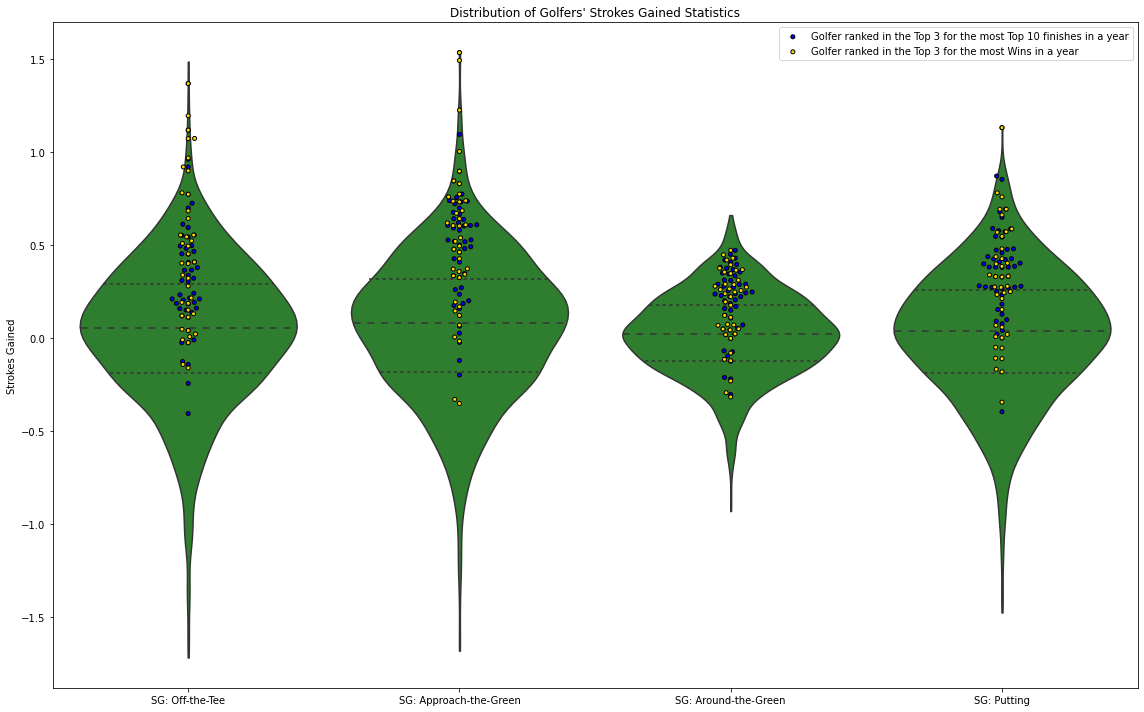

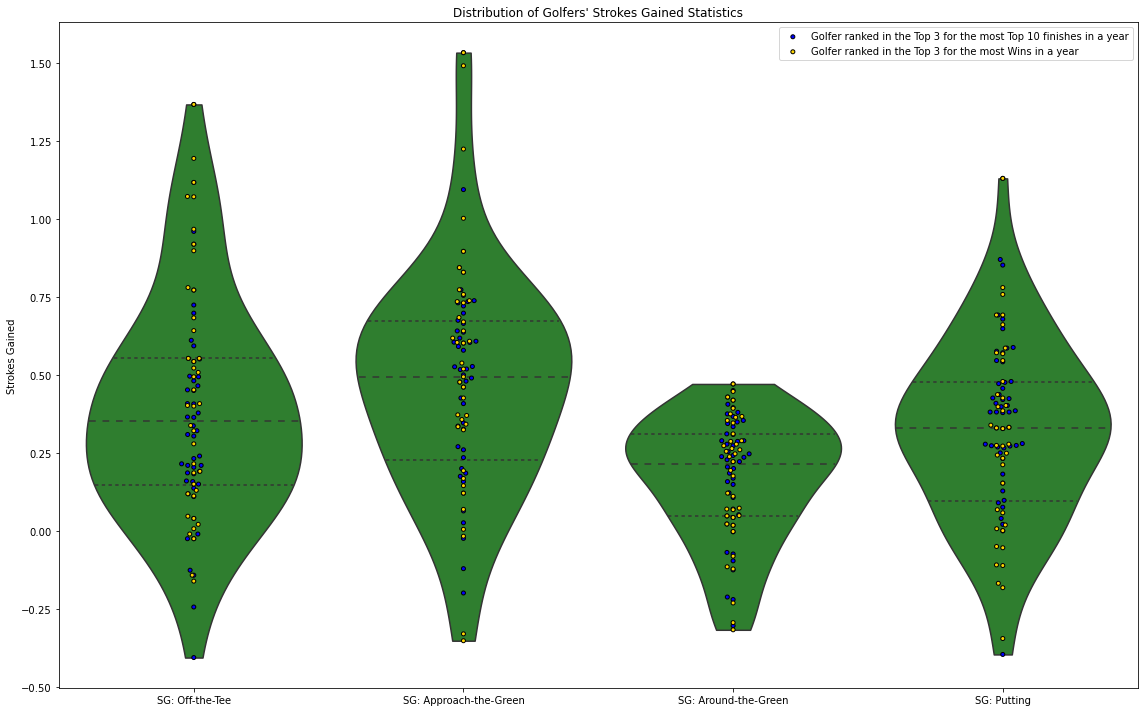

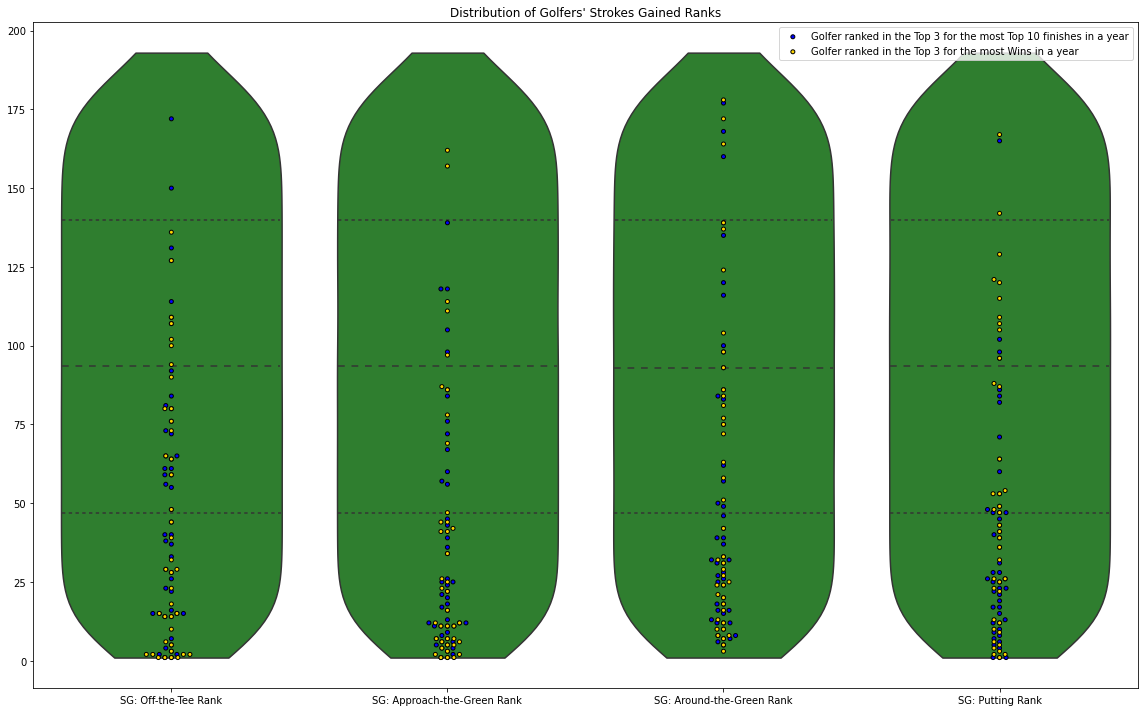

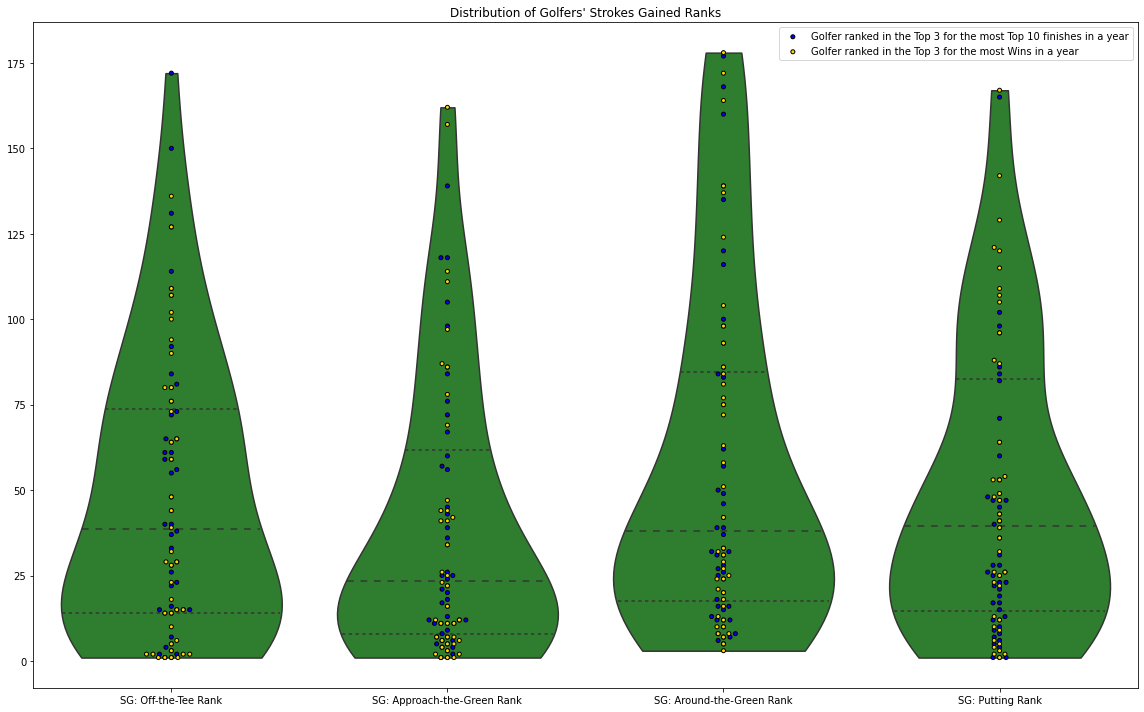

In [126]:
from plotting import make_violin_top_performer_plots
# Note this distrubution is double counting players who where in the top 3 for both wins and top 10s
make_violin_top_performer_plots(df,strokes_gained_stats)
make_violin_top_performer_plots(top_performers,strokes_gained_stats)
make_violin_top_performer_plots(df,strokes_gained_stats_rank)
make_violin_top_performer_plots(top_performers,strokes_gained_stats_rank)

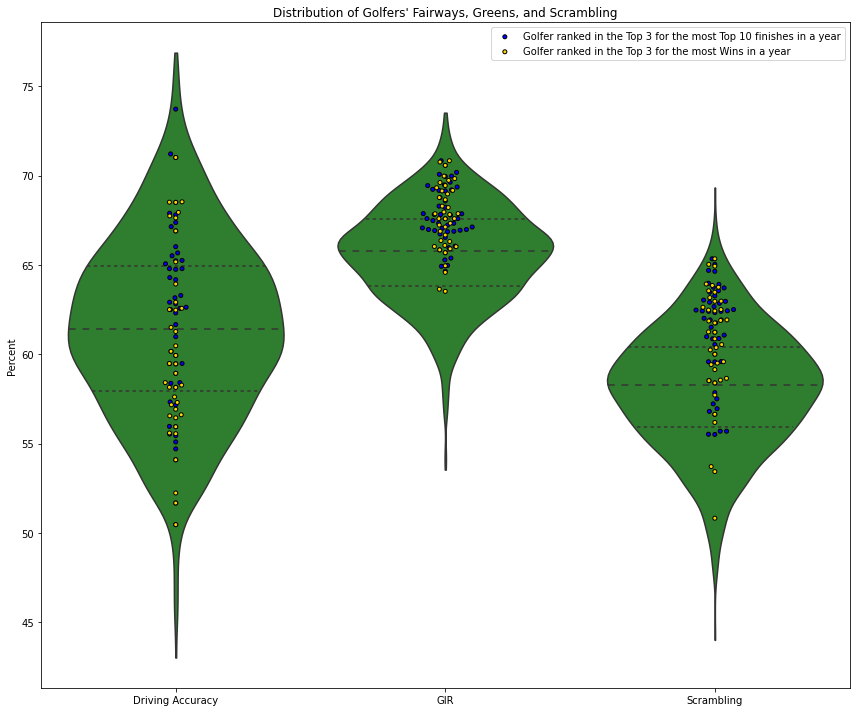

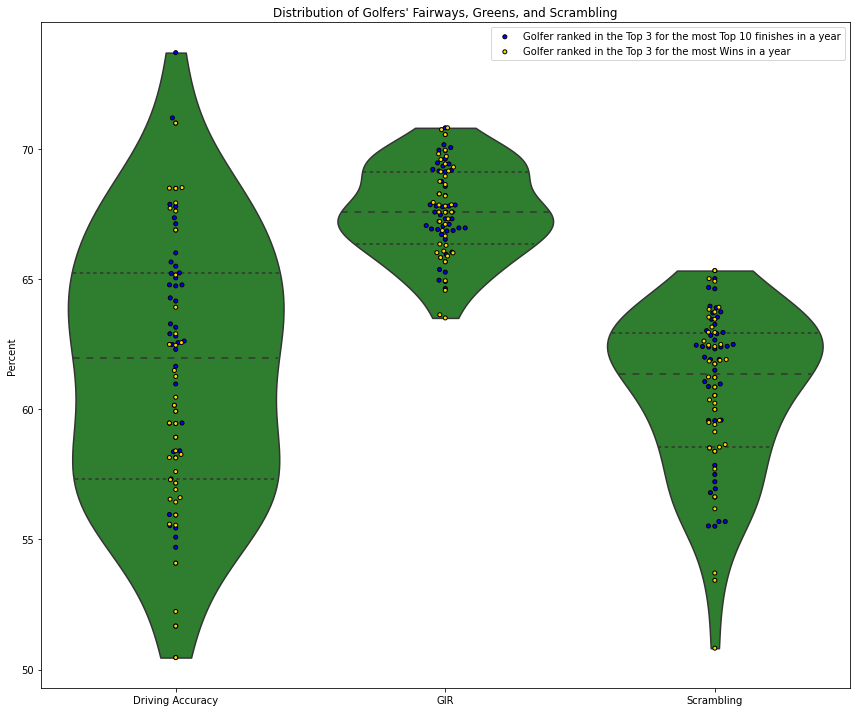

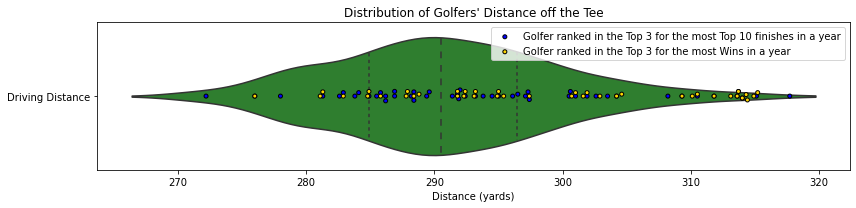

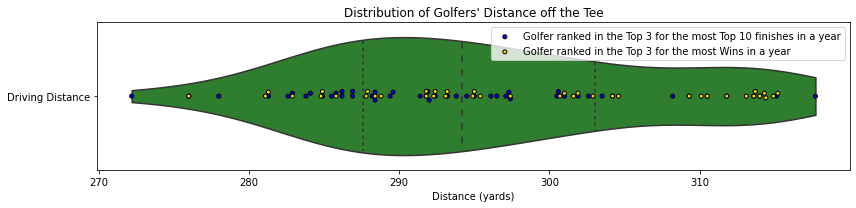

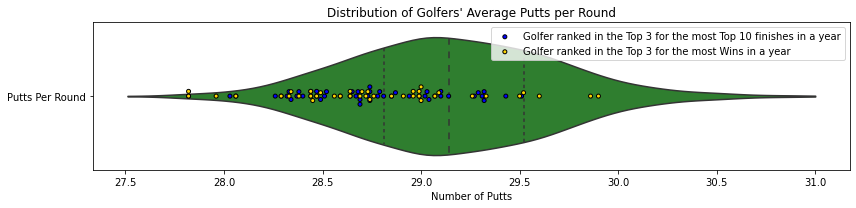

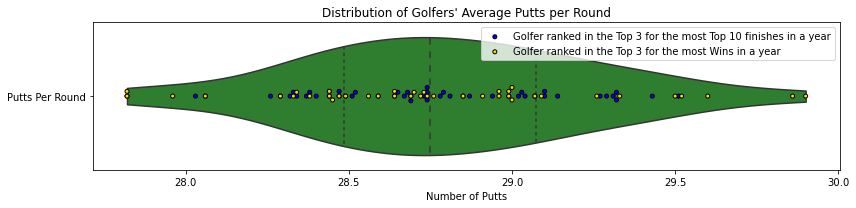

In [127]:
make_violin_top_performer_plots(df,fairway_green_scramble_pct_columns)
make_violin_top_performer_plots(top_performers,fairway_green_scramble_pct_columns)
make_violin_top_performer_plots(df,distance_off_tee_column,orientation='h')
make_violin_top_performer_plots(top_performers,distance_off_tee_column,orientation='h')
make_violin_top_performer_plots(df,avg_putts_column,orientation='h')
make_violin_top_performer_plots(top_performers,avg_putts_column,orientation='h')

In [90]:
traditional_stats_rank.column_names

['Fairway Percentage rank',
 'Avg Distance rank',
 'gir rank',
 'Average Putts rank',
 'Average Scrambling rank']

In [ ]:
df.hist()

array([[<AxesSubplot:title={'center':'Wins'}>,
        <AxesSubplot:title={'center':'Wins rank'}>,
        <AxesSubplot:title={'center':'Top 10'}>,
        <AxesSubplot:title={'center':'Top 10 rank'}>,
        <AxesSubplot:title={'center':'Fairway Percentage'}>],
       [<AxesSubplot:title={'center':'Fairway Percentage rank'}>,
        <AxesSubplot:title={'center':'Avg Distance'}>,
        <AxesSubplot:title={'center':'Avg Distance rank'}>,
        <AxesSubplot:title={'center':'gir'}>,
        <AxesSubplot:title={'center':'gir rank'}>],
       [<AxesSubplot:title={'center':'Average Scrambling'}>,
        <AxesSubplot:title={'center':'Average Scrambling rank'}>,
        <AxesSubplot:title={'center':'Average Putts'}>,
        <AxesSubplot:title={'center':'Average Putts rank'}>,
        <AxesSubplot:title={'center':'Average Score'}>],
       [<AxesSubplot:title={'center':'Average Score rank'}>,
        <AxesSubplot:title={'center':'SG:OTT'}>,
        <AxesSubplot:title={'center':'SG:OTT r

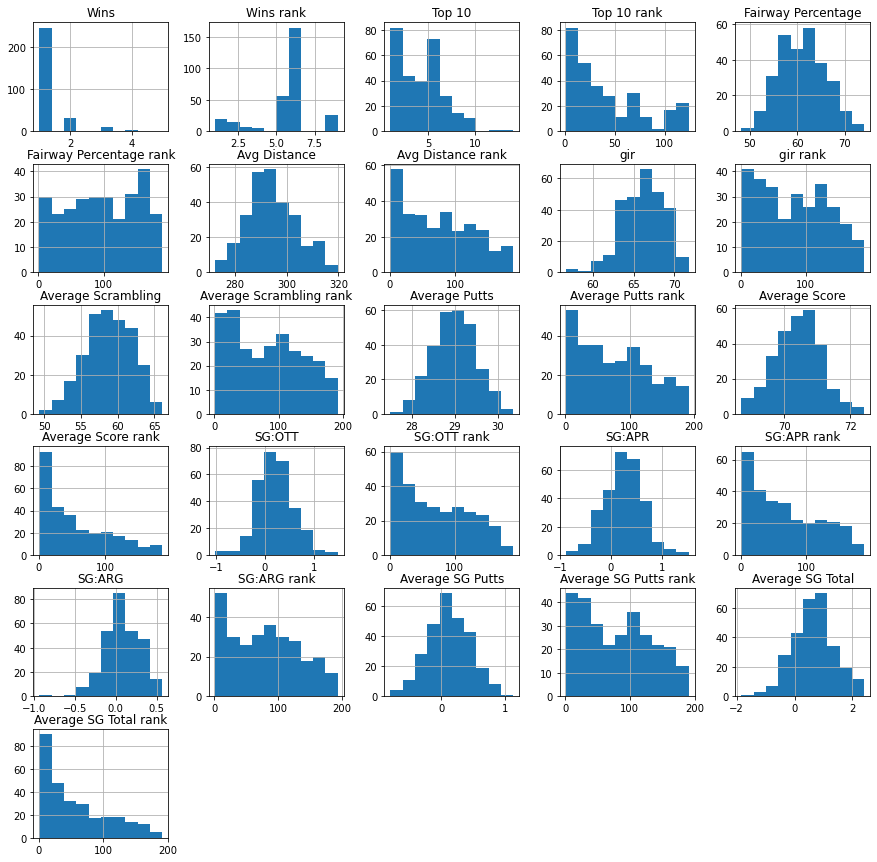

In [95]:
df[df['Wins']>0].drop('Year',axis=1).hist(figsize=(15,15))

In [113]:
df_original[df['Year']==2010][['Player Name','Year','Wins','Top 10','Money']].sort_values('Money',ascending=False).head(20)

,Player Name,Year,Wins,Top 10,Money
1636,Greg Chalmers,2010,NaN,2.0,"989,415"
1663,Andres Romero,2010,NaN,2.0,"979,170"
1566,D.A. Points,2010,NaN,3.0,"975,433"
1625,Webb Simpson,2010,NaN,1.0,"972,962"
1665,Derek Lamely,2010,1.0,1.0,"972,961"
1510,Chad Campbell,2010,NaN,2.0,"971,154"
1522,Kenny Perry,2010,NaN,1.0,"968,811"
1537,Blake Adams,2010,NaN,2.0,"963,593"
1520,Steve Elkington,2010,NaN,3.0,"955,084"
1564,Graham DeLaet,2010,NaN,1.0,"954,011"


In [116]:
df_original[(df['Year']==2010) & (df['Player Name']=='Matt Kuchar')]

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
1524,Matt Kuchar,97.0,67.89,2010,286.9,69.36,28.74,64.69,69.606,"1,437",NaN,9.0,0.648,1.461,0.158,0.336,0.334,"4,910,477"


In [124]:
df_original[(df_original['Year']==2010) & ((df_original['Wins']==2) | (df_original['Top 10']>=6))][['Player Name','Wins','Top 10','Money']]

,Player Name,Wins,Top 10,Money
1489,Tim Clark,1.0,6.0,"3,530,002"
1495,Jim Furyk,2.0,6.0,"4,809,622"
1515,Steve Stricker,2.0,6.0,"4,190,235"
1523,Hunter Mahan,2.0,3.0,"3,574,550"
1524,Matt Kuchar,NaN,9.0,"4,910,477"
1550,Brendon de Jonge,NaN,6.0,"2,167,978"
1556,Bo Van Pelt,NaN,6.0,"3,336,258"
1557,Justin Rose,2.0,4.0,"3,603,331"
1561,Retief Goosen,NaN,8.0,"3,218,089"
1588,Bryce Molder,NaN,6.0,"1,428,438"


In [128]:
df.describe()

,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,gir,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,...,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,2013.996107,0.154412,29.962370,1.754325,101.101644,61.440560,93.735399,290.807688,93.513707,65.661675,...,0.037759,93.730632,0.065015,93.713945,0.019974,93.678188,0.025641,93.717521,0.148105,93.749702
std,2.581176,0.453781,9.684279,2.016854,55.930387,5.058845,53.957196,8.916631,53.950402,2.745411,...,0.379892,53.961504,0.380952,53.962954,0.223361,53.949933,0.343787,53.961536,0.694923,53.964414
min,2010.000000,0.000000,1.000000,0.000000,1.000000,43.020000,1.000000,266.400000,1.000000,53.540000,...,-1.717000,1.000000,-1.680000,1.000000,-0.930000,1.000000,-1.475000,1.000000,-3.209000,1.000000
25%,2012.000000,0.000000,30.000000,0.000000,50.000000,57.942500,47.000000,284.900000,47.000000,63.830000,...,-0.190250,47.000000,-0.180750,47.000000,-0.123000,47.000000,-0.187000,47.000000,-0.254750,47.000000
50%,2014.000000,0.000000,32.000000,1.000000,111.000000,61.430000,94.000000,290.550000,93.000000,65.790000,...,0.056000,93.500000,0.081000,93.500000,0.022000,93.000000,0.040000,93.500000,0.147000,94.000000
75%,2016.000000,0.000000,36.000000,3.000000,155.000000,64.910000,140.000000,296.400000,140.000000,67.580000,...,0.291500,140.000000,0.314500,140.000000,0.175000,140.000000,0.257000,140.000000,0.568500,140.000000
max,2018.000000,5.000000,37.000000,14.000000,172.000000,76.880000,193.000000,319.700000,193.000000,73.520000,...,1.485000,193.000000,1.533000,193.000000,0.660000,193.000000,1.130000,193.000000,2.406000,193.000000


In [129]:
top_performers.describe()

,Year,Wins,Wins rank,Top 10,Top 10 rank,Fairway Percentage,Fairway Percentage rank,Avg Distance,Avg Distance rank,gir,...,SG:OTT,SG:OTT rank,SG:APR,SG:APR rank,SG:ARG,SG:ARG rank,Average SG Putts,Average SG Putts rank,Average SG Total,Average SG Total rank
count,73.000000,73.000000,73.000000,73.000000,73.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2013.424658,1.589041,9.534247,7.082192,7.369863,61.583472,94.527778,295.955556,64.638889,67.583611,...,0.384875,48.013889,0.468083,40.333333,0.162153,57.569444,0.314347,48.986111,1.326278,18.208333
std,2.645320,1.164708,12.640414,2.032742,10.436989,5.094344,55.259687,11.127518,54.386283,1.746336,...,0.357557,41.856392,0.359196,41.239595,0.200939,50.822205,0.290001,42.584628,0.583416,22.034504
min,2010.000000,0.000000,1.000000,3.000000,1.000000,50.460000,4.000000,272.200000,1.000000,63.520000,...,-0.406000,1.000000,-0.352000,1.000000,-0.317000,3.000000,-0.396000,1.000000,0.244000,1.000000
25%,2011.000000,1.000000,1.000000,6.000000,2.000000,57.322500,47.750000,287.575000,14.750000,66.347500,...,0.146750,14.000000,0.226250,7.750000,0.046750,17.500000,0.096000,14.500000,0.894250,3.000000
50%,2013.000000,2.000000,3.000000,7.000000,3.000000,61.985000,97.500000,294.150000,52.000000,67.585000,...,0.351000,38.500000,0.492000,23.500000,0.213500,38.000000,0.329000,39.500000,1.390000,8.000000
75%,2015.000000,2.000000,6.000000,8.000000,7.000000,65.235000,145.500000,303.050000,107.000000,69.147500,...,0.553000,73.750000,0.671250,61.750000,0.309500,84.500000,0.476750,82.500000,1.752000,22.250000
max,2018.000000,5.000000,37.000000,14.000000,43.000000,73.720000,181.000000,317.700000,188.000000,70.830000,...,1.367000,172.000000,1.533000,162.000000,0.471000,178.000000,1.130000,167.000000,2.406000,84.000000


In [137]:
def print_col_stats(df,col):
    print(f'{col} summary stats:')
    print(f'          mean: {df[col].mean()}')
    print(f' std deviation: {df[col].std()}')
    print(f'           min: {df[col].min()}')
    print(f'            q1: {df[col].quantile(.25)}')
    print(f'        median: {df[col].median()}')
    print(f'            q3: {df[col].quantile(.75)}')
    print(f'           max: {df[col].max()}\n')
    
print_col_stats(df,'Avg Distance')
print_col_stats(top_performers,'Avg Distance')

Avg Distance summary stats:
          mean: 290.80768772348017
 std deviation: 8.91663138981874
           min: 266.4
            q1: 284.9
        median: 290.55
            q3: 296.4
           max: 319.7

Avg Distance summary stats:
          mean: 295.9555555555556
 std deviation: 11.127518089939938
           min: 272.2
            q1: 287.575
        median: 294.15
            q3: 303.04999999999995
           max: 317.7



In [141]:
columns_of_interest

['Player Name',
 'Year',
 'Wins',
 'Top 10',
 'Fairway Percentage',
 'Avg Distance',
 'gir',
 'Average Scrambling',
 'Average Putts',
 'Average Score',
 'SG:OTT',
 'SG:APR',
 'SG:ARG',
 'Average SG Putts',
 'Average SG Total']

In [146]:
# col = 'Fairway Percentage'
# col = 'gir'
# col = 'Average Scrambling'
cols = (col for col in columns_of_interest if col not in  ['Player Name','Year'])
for col in cols:
    print_col_stats(df,col)
    print_col_stats(top_performers,col)

Wins summary stats:
          mean: 0.15441176470588236
 std deviation: 0.4537811717069906
           min: 0.0
            q1: 0.0
        median: 0.0
            q3: 0.0
           max: 5.0

Wins summary stats:
          mean: 1.5890410958904109
 std deviation: 1.1647080754701788
           min: 0.0
            q1: 1.0
        median: 2.0
            q3: 2.0
           max: 5.0

Top 10 summary stats:
          mean: 1.754325259515571
 std deviation: 2.016854205424608
           min: 0.0
            q1: 0.0
        median: 1.0
            q3: 3.0
           max: 14.0

Top 10 summary stats:
          mean: 7.082191780821918
 std deviation: 2.032741885685538
           min: 3.0
            q1: 6.0
        median: 7.0
            q3: 8.0
           max: 14.0

Fairway Percentage summary stats:
          mean: 61.44056019070331
 std deviation: 5.058844800703346
           min: 43.02
            q1: 57.942499999999995
        median: 61.43
            q3: 64.91
           max: 76.88

Fairway